In [1]:
!pip install ultralytics
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.151 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/107.7 GB disk)


In [2]:
from ultralytics import YOLO
from IPython.display import display,Image
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/DOG_YOLO_CUSTOM_MODEL

/content/drive/MyDrive/DOG_YOLO_CUSTOM_MODEL


In [4]:
!ls


data1  Untitled0.ipynb


Training the model

In [5]:
%cd /content/drive/MyDrive/DOG_YOLO_CUSTOM_MODEL

/content/drive/MyDrive/DOG_YOLO_CUSTOM_MODEL


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data = data.yaml epochs=25 imgsz=224 plots=True

100% 21.5M/21.5M [00:00<00:00, 116MB/s] 
Ultralytics YOLOv8.0.151 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, in

In [7]:
!ls runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1691680406.ae619a4e6fff.2507.0  train_batch2.jpg
F1_curve.png					    train_batch45.jpg
labels_correlogram.jpg				    train_batch46.jpg
labels.jpg					    train_batch47.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    weights
results.csv


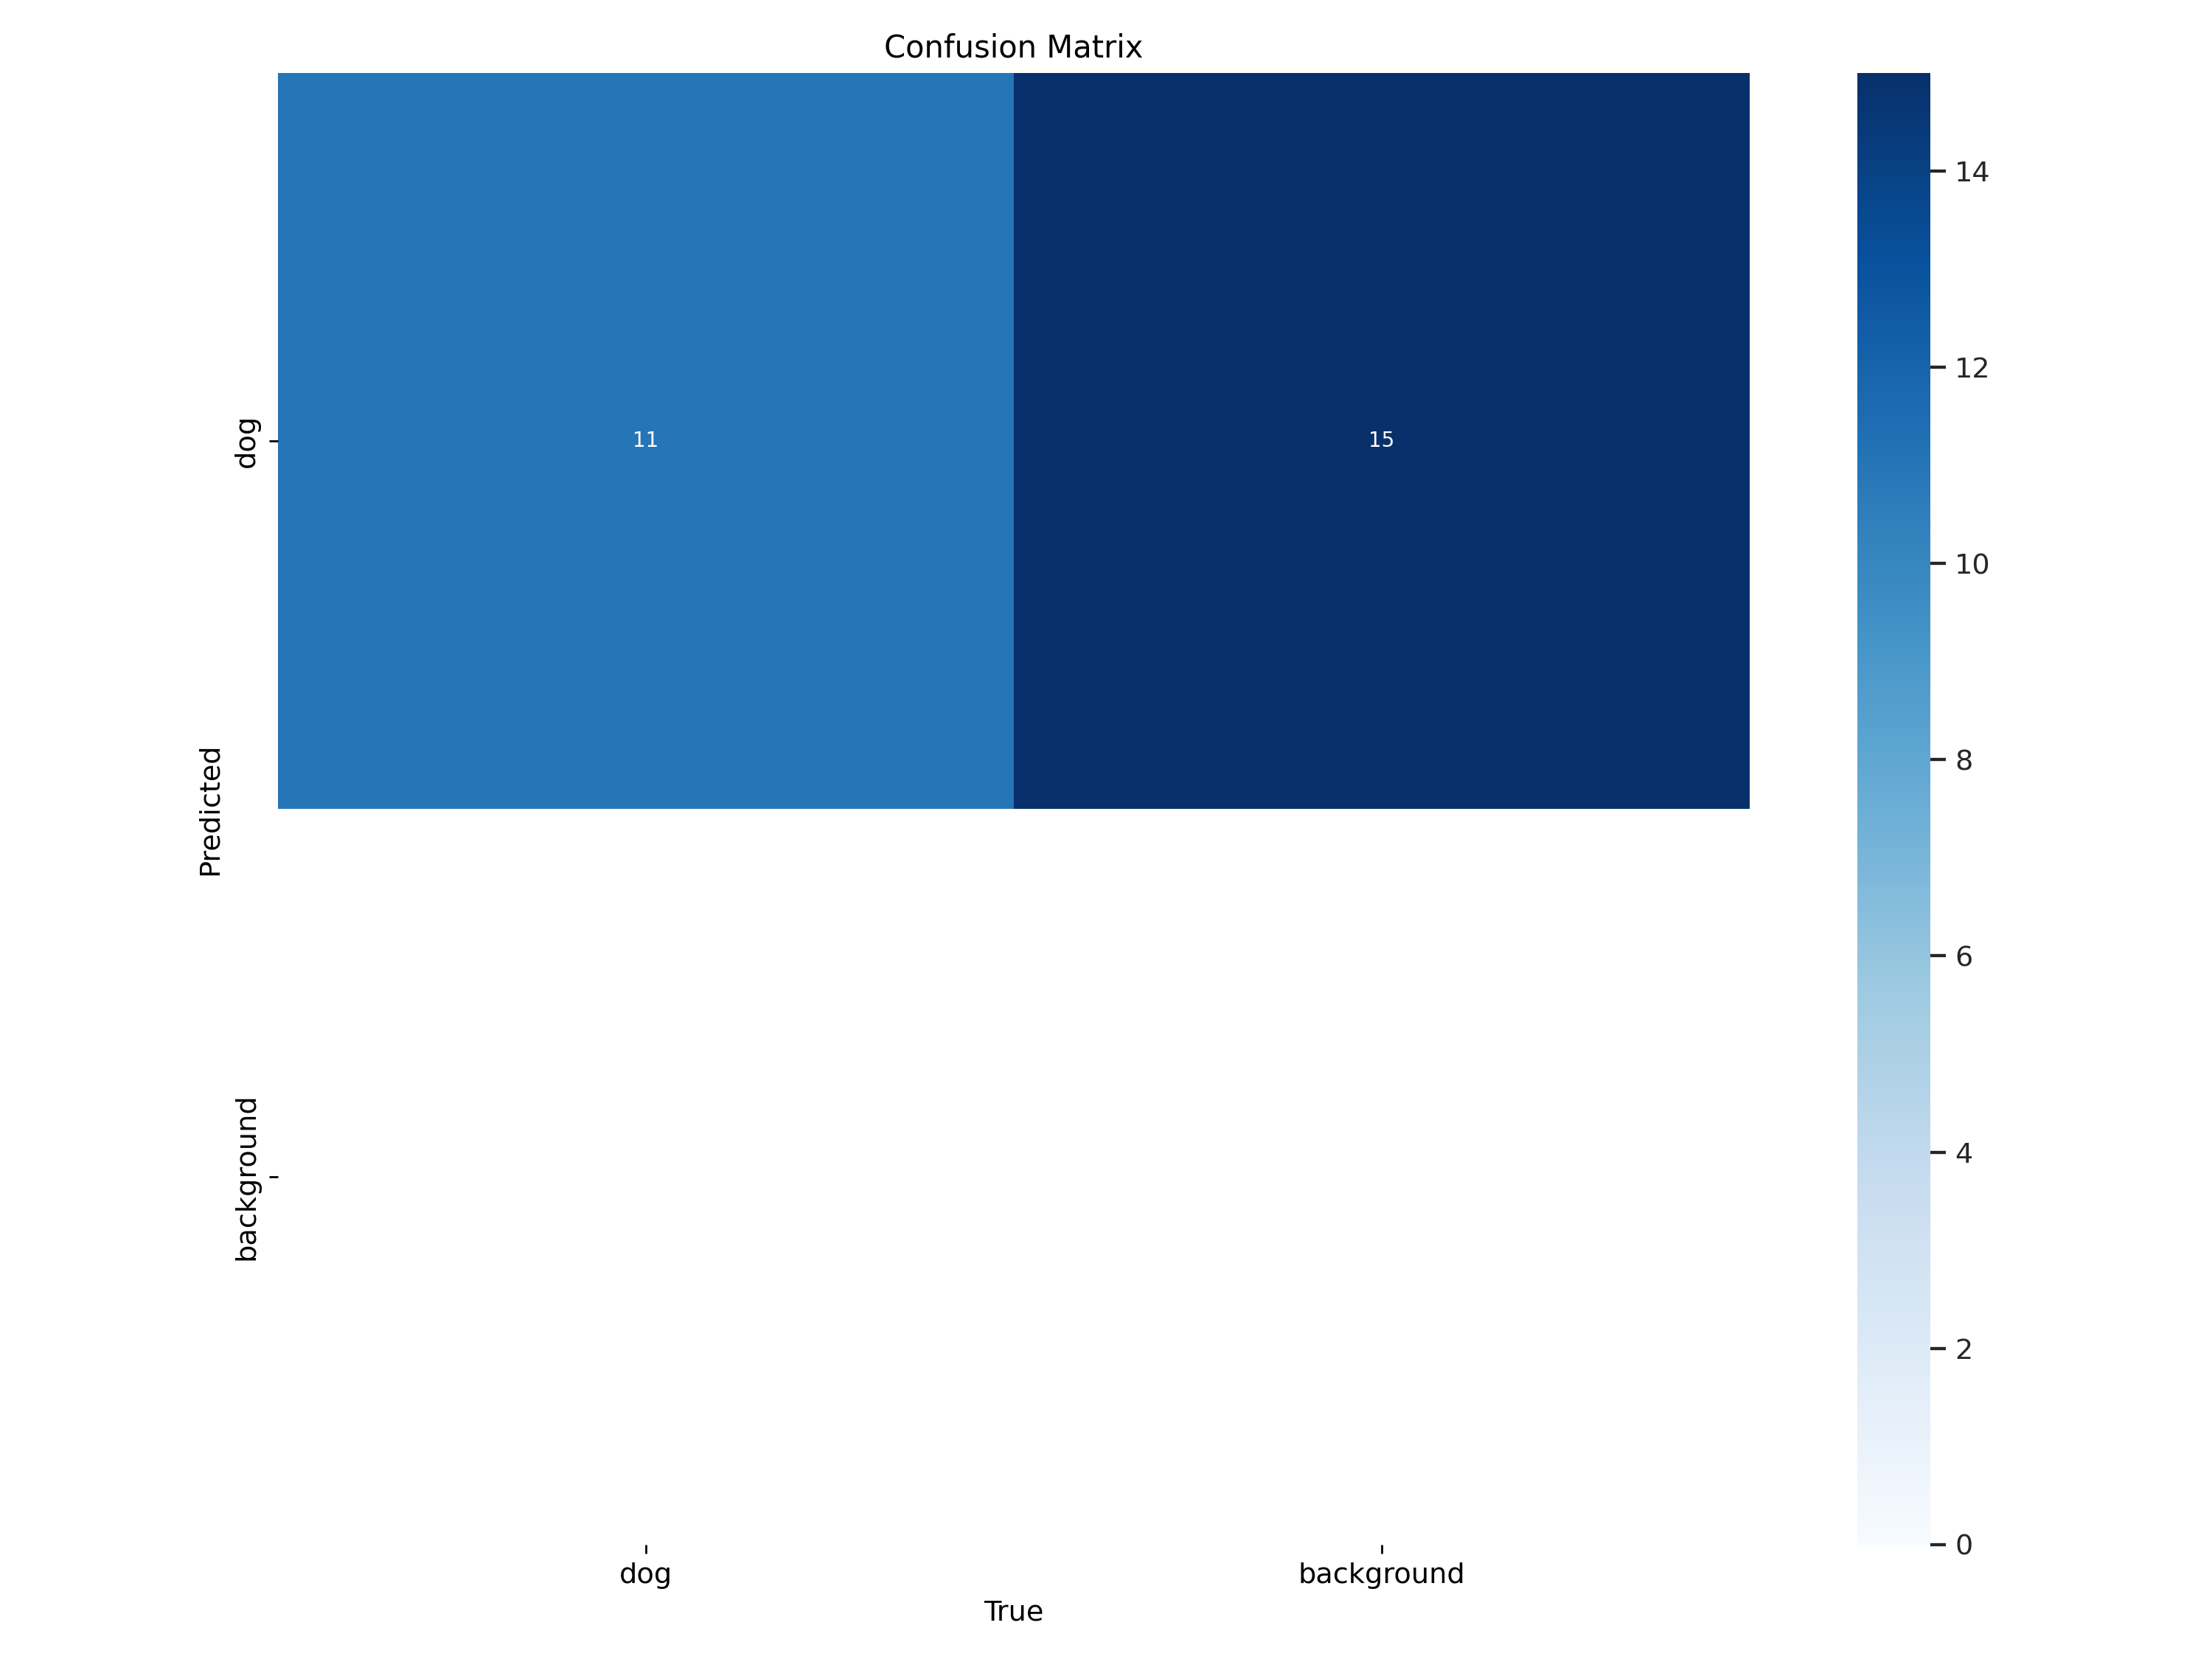

In [8]:
Image(filename ='runs/detect/train/confusion_matrix.png',width = 600)

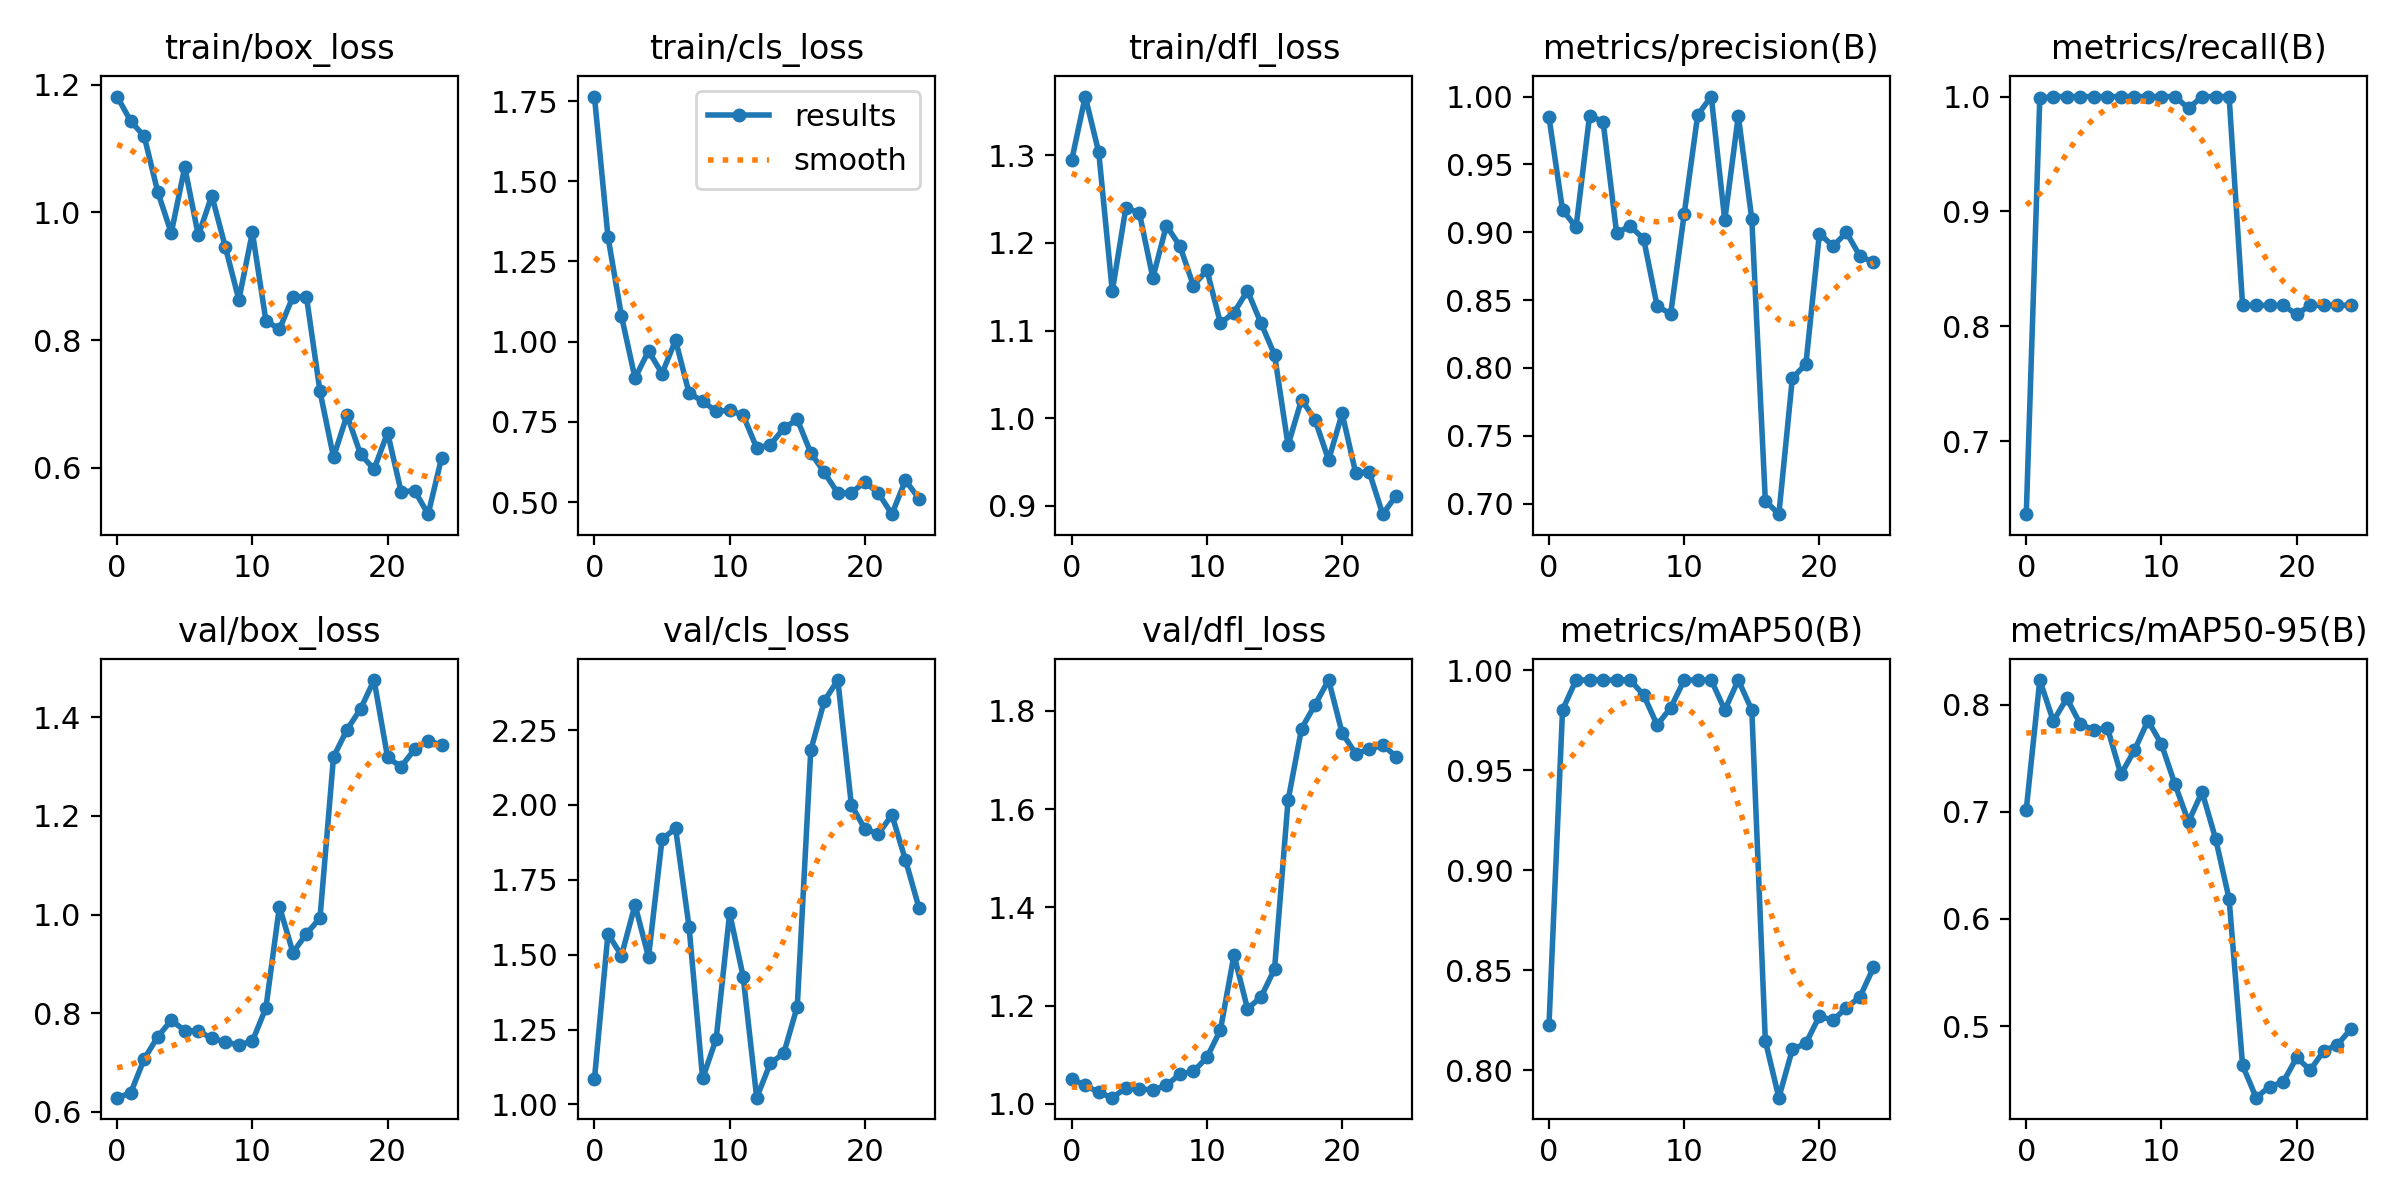

In [9]:
Image(filename ='runs/detect/train/results.png',width = 600)

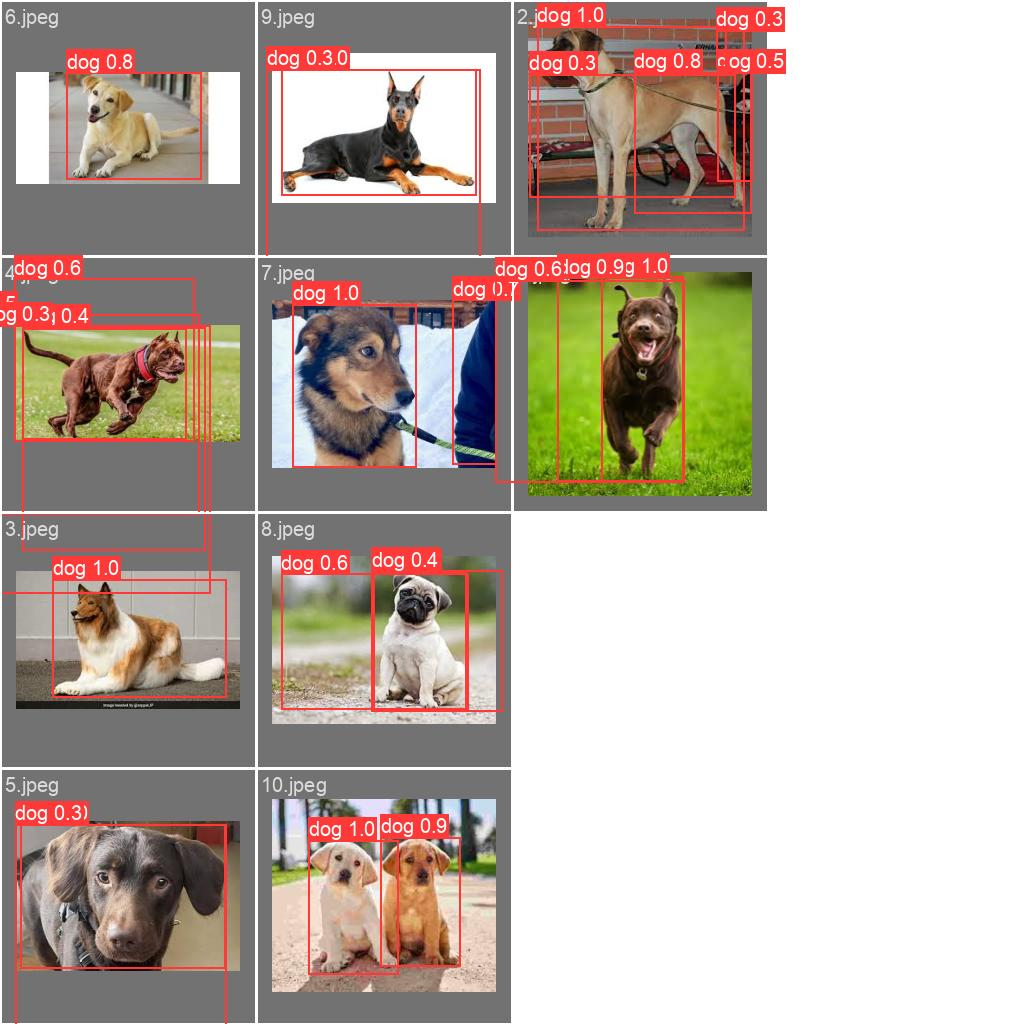

In [10]:
Image(filename = 'runs/detect/train/val_batch0_pred.jpg',width = 600)

Validating the model

In [11]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.151 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/DOG_YOLO_CUSTOM_MODEL/data1/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.55s/it]
                   all         10         11      0.917      0.998       0.98      0.823
Speed: 2.5ms preprocess, 128.9ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/val


In [13]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data1/test/images

Ultralytics YOLOv8.0.151 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/10 /content/drive/MyDrive/DOG_YOLO_CUSTOM_MODEL/data1/test/images/1.jpeg: 160x224 4 dogs, 82.7ms
image 2/10 /content/drive/MyDrive/DOG_YOLO_CUSTOM_MODEL/data1/test/images/10.jpeg: 160x224 1 dog, 68.7ms
image 3/10 /content/drive/MyDrive/DOG_YOLO_CUSTOM_MODEL/data1/test/images/2.jpeg: 160x224 7 dogs, 67.9ms
image 4/10 /content/drive/MyDrive/DOG_YOLO_CUSTOM_MODEL/data1/test/images/3.jpeg: 160x224 2 dogs, 80.1ms
image 5/10 /content/drive/MyDrive/DOG_YOLO_CUSTOM_MODEL/data1/test/images/4.jpeg: 160x224 3 dogs, 73.7ms
image 6/10 /content/drive/MyDrive/DOG_YOLO_CUSTOM_MODEL/data1/test/images/5.jpeg: 128x224 2 dogs, 73.1ms
image 7/10 /content/drive/MyDrive/DOG_YOLO_CUSTOM_MODEL/data1/test/images/6.jpeg: 128x224 2 dogs, 60.7ms
image 8/10 /content/drive/MyDrive/DOG_YOLO_CUSTOM_MODEL/data1/test/images/7.jpeg: 160x224 1 dog, 67.9ms
image 9

In [14]:
import glob
from IPython.display import Image,display
for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
  display(Image(filename = image_path,width = 600))
  print("\n")